In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [38]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.0000001]
a = [1]
b = [100]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    print("a: {}\nb: {}".format(a[i], b[i]))
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    print("lambda: {}\nmu: {}\nLambda: {}\nlambdaLambda: {}".format(lmd, mu[i], gauss_lambda[i], lmd*gauss_lambda[i]))
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
#    xs = [10**(e*0.1) for e in range(-100,20)]
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

a: 1
b: 100


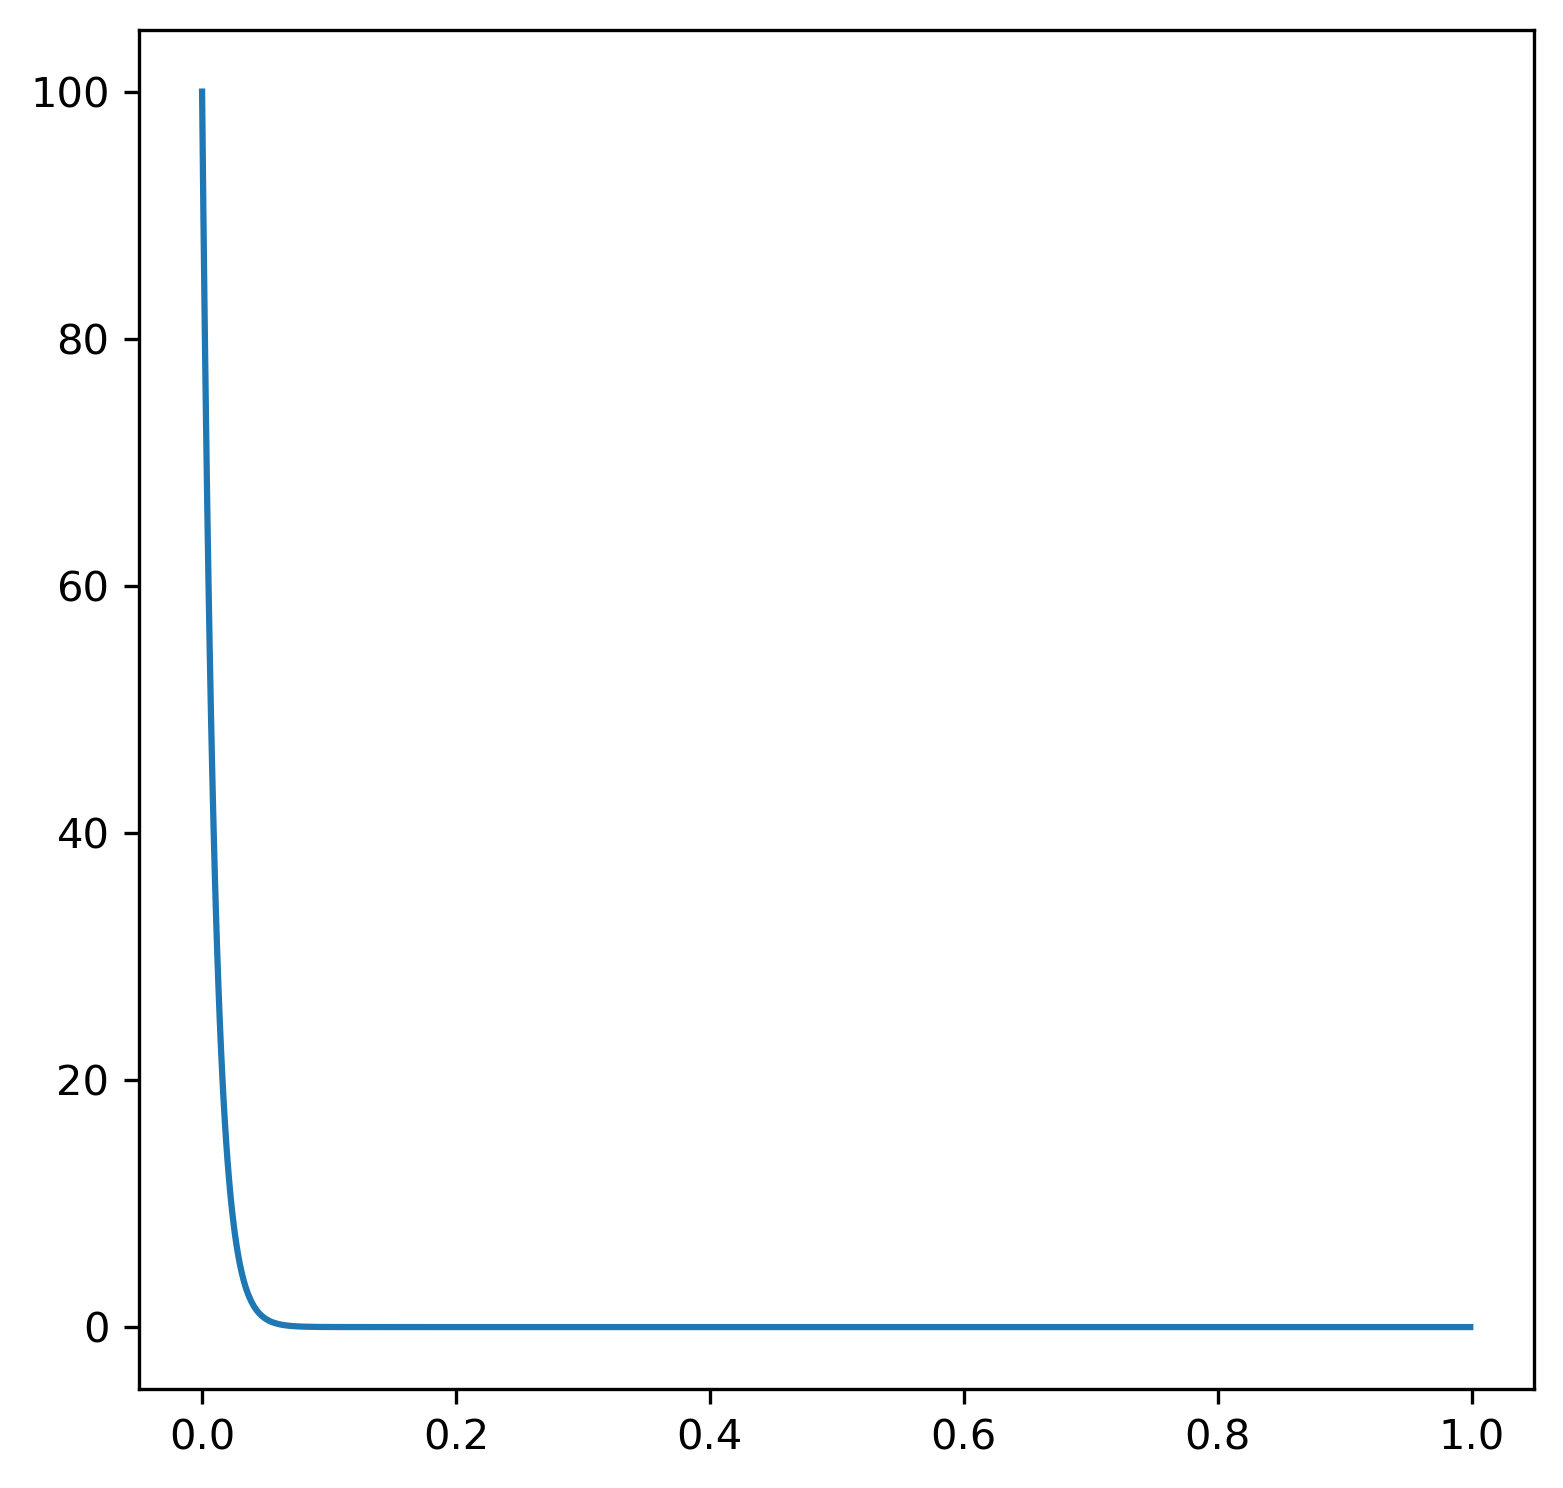

In [43]:
lambda_dist = gen_lambda_dist()
plt.figure(figsize=(6, 6), dpi=300)
#plt.xscale("log")
draw(lambda_dist, 0, 1, 0.001)

In [4]:
lambda_dist.rvs(10)

array([0.00668341, 0.00986002, 0.00884411, 0.01336663, 0.00412842,
       0.00240056, 0.01271924, 0.00171496, 0.00319708, 0.01344341])

In [5]:
lmd = lambda_dist.rvs(1)
print(lmd)
w_dist = gen_w_dist(lmd)

[0.00436552]
lambda: [0.00436552]
mu: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Lambda: [[1.e-07 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-07 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-07 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-07 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-07]]
lambdaLambda: [[4.36552016e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 4.36552016e-10 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.36552016e-10 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.36552016e-10
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.36552016e-10]]


In [6]:
w_dist.rvs(10)

array([[ 50754.33209685,   8758.76017599, -14829.47199431,
        -59351.68727604,  -8172.6594597 ],
       [ -9712.21697961,  13177.03525068,  69113.97381182,
         13996.4113957 ,   2876.54223226],
       [ 34964.55578965,  88883.68228184,  36321.78415631,
         15000.06416659,  40813.32319508],
       [-41421.28503123, -15293.72212873, -21335.32970053,
         12920.14634054,  -8881.19132907],
       [-67259.48607434, -18277.35693191, -65416.77631455,
         49829.71082711,  42006.37967756],
       [-32773.71317087,  41197.49378419, -63997.66333668,
         17172.78897087, -85039.16419231],
       [ 13847.94673905, -40247.80842174, -49853.26102343,
         15651.99864611, -68571.29695728],
       [107509.15321376,  22258.07625518,  10124.54588508,
         29856.05694962,  51802.17668168],
       [-88957.27689627,   8380.07357919,  47810.61746569,
        -27201.38384672, -56698.82742832],
       [-34496.06955904, -91160.05727186, -42572.63808857,
        -17864.29526965

In [7]:
w_dist.cov

array([[2.29067777e+09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.29067777e+09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.29067777e+09, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.29067777e+09,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.29067777e+09]])

In [8]:
#data = []
#for i in range(1000):
#    x = (np.random.rand() - 0.5)*10
#    y = x**2 + np.random.randn() + 0.4
    
#    data.append([x,y])

data = data.x_00121_5

In [9]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

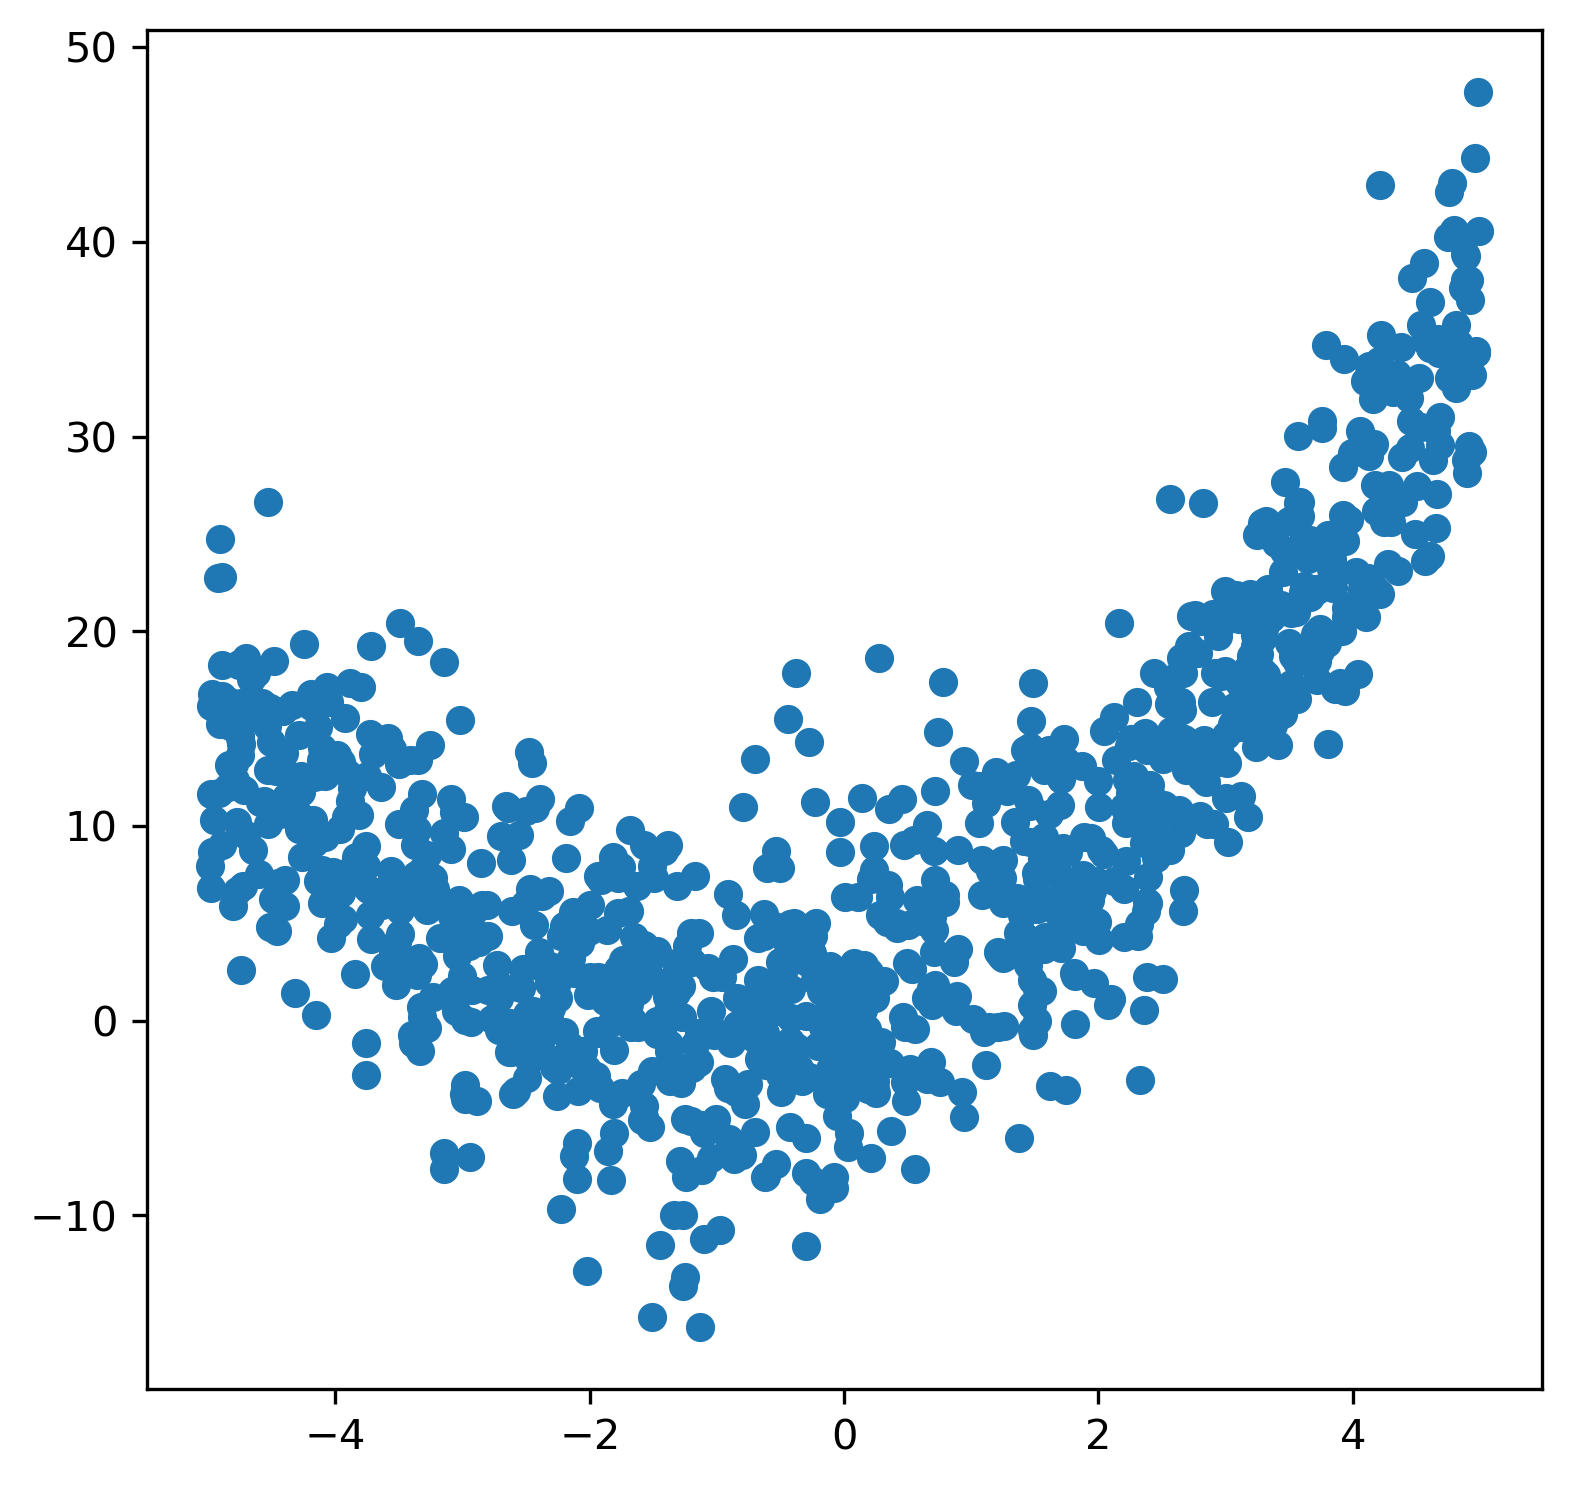

In [45]:
plt.figure(figsize=(6, 6), dpi=300)
draw_data(data)

a: 1
b: 100
lambda: 0.029864962163664674
mu: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Lambda: [[1.e-07 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-07 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-07 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-07 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-07]]
lambdaLambda: [[2.98649622e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.98649622e-09 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.98649622e-09 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.98649622e-09
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.98649622e-09]]
lambda: 0.00885259464086701
mu: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Lambda: [[1.e-07 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-07 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-07 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-07 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-07]]
lambdaLambda: [[8.85259464e-10 0.00000000e+00 0.

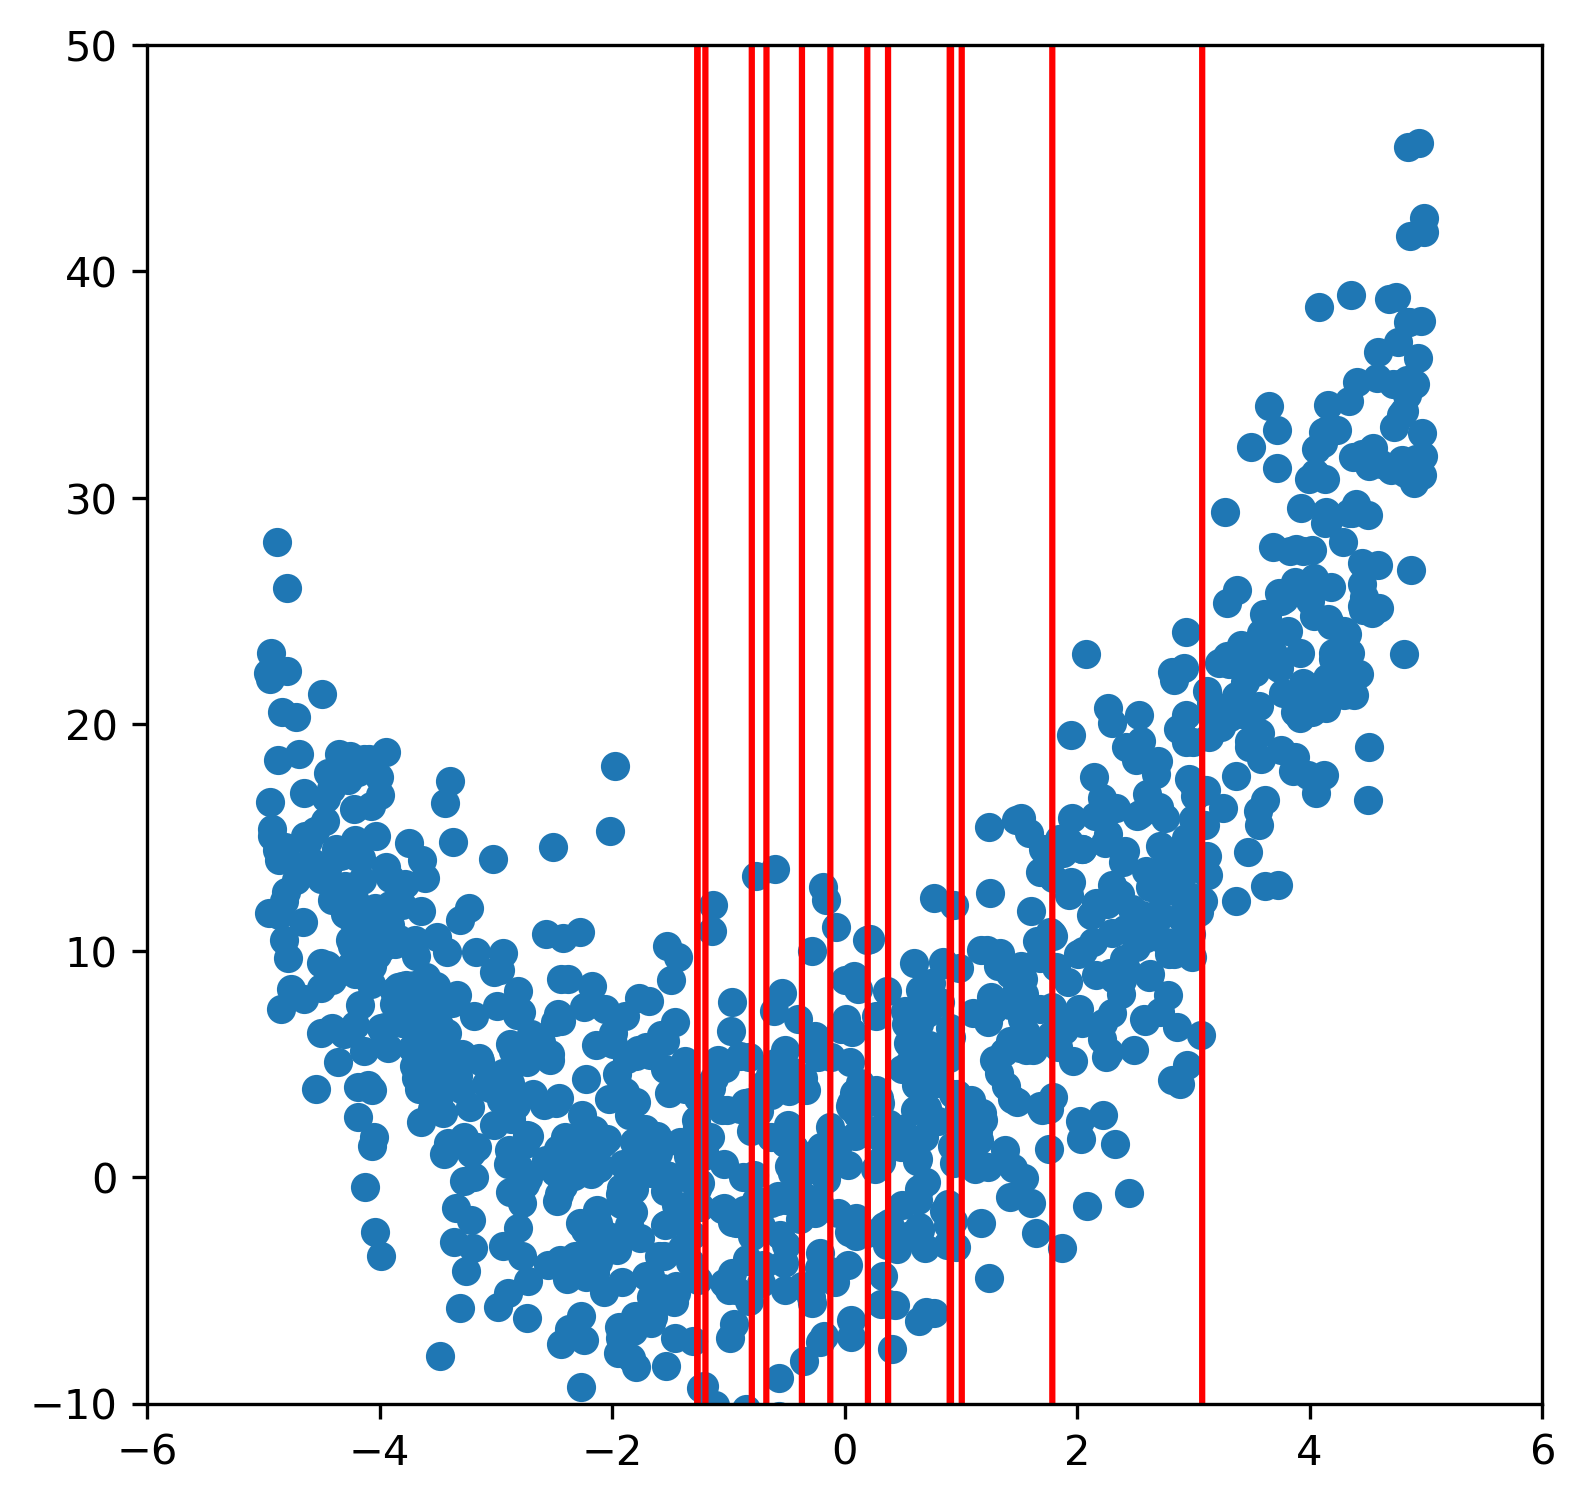

In [11]:
def draw_estimate(data, mus):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    plt.figure(figsize=(6, 6), dpi=300)
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for lmd in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-6,6)
    plt.ylim(-10,50)
    plt.show()
   
draw_estimates(10, data)

In [12]:
def update(data):
    i = len(mu)
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
 #   plt.figure(figsize=(10, 10), dpi=300)
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[j][1]*ph_vecs[j] for j in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[i]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[i].T, gauss_lambda[i]) , mu[i] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

a: 3.5
b: 100.00005623864456
lambda: 0.027352354091014885
mu: [[15.1793888 ]
 [28.68609911]
 [-8.26742081]
 [-1.7030062 ]
 [ 0.47521185]]
Lambda: [[5.00000010e+00 7.68984794e+00 6.93852780e+01 1.62054552e+02
  1.33674124e+03]
 [7.68984794e+00 6.93852781e+01 1.62054552e+02 1.33674124e+03
  3.67981074e+03]
 [6.93852780e+01 1.62054552e+02 1.33674124e+03 3.67981074e+03
  2.74834610e+04]
 [1.62054552e+02 1.33674124e+03 3.67981074e+03 2.74834610e+04
  8.67902148e+04]
 [1.33674124e+03 3.67981074e+03 2.74834610e+04 8.67902148e+04
  5.85752420e+05]]
lambdaLambda: [[1.36761773e-01 2.10335444e-01 1.89785069e+00 4.43257348e+00
  3.65630198e+01]
 [2.10335444e-01 1.89785070e+00 4.43257348e+00 3.65630198e+01
  1.00651486e+02]
 [1.89785069e+00 4.43257348e+00 3.65630198e+01 1.00651486e+02
  7.51737357e+02]
 [4.43257348e+00 3.65630198e+01 1.00651486e+02 7.51737357e+02
  2.37391669e+03]
 [3.65630198e+01 1.00651486e+02 7.51737357e+02 2.37391669e+03
  1.60217076e+04]]
lambda: 0.021657693365522743
mu: [[15.

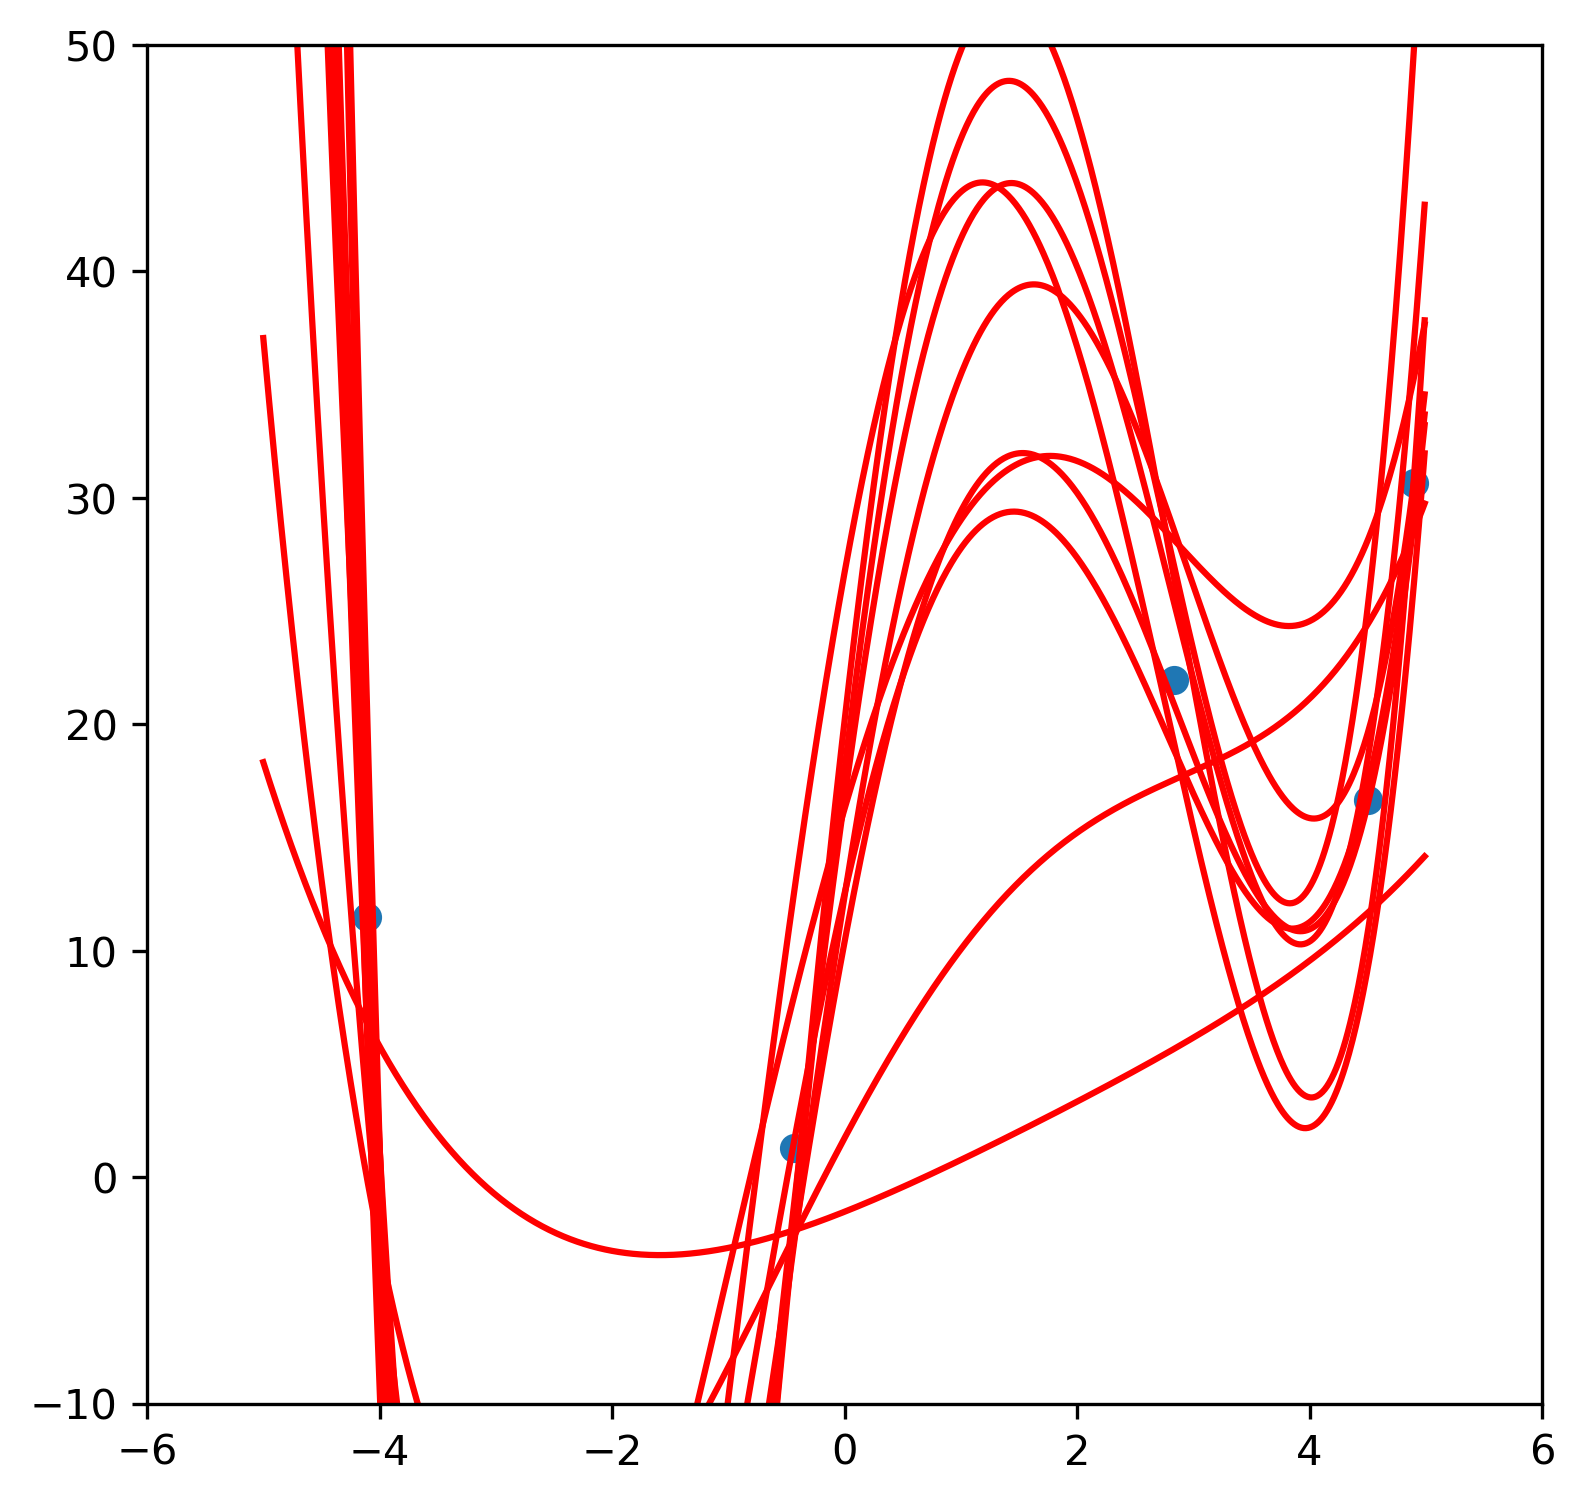

In [13]:
update(data[:5])
draw_estimates(10, data[:5])

a: 6.0
b: 230.5675214238811
lambda: 0.042822168770555745
mu: [[ 3.190423  ]
 [ 4.37280402]
 [-0.31701561]
 [-0.19051214]
 [ 0.06462408]]
Lambda: [[1.00000001e+01 2.18143398e+01 1.21852274e+02 3.83805151e+02
  2.32988546e+03]
 [2.18143398e+01 1.21852274e+02 3.83805151e+02 2.32988546e+03
  8.24810768e+03]
 [1.21852274e+02 3.83805151e+02 2.32988546e+03 8.24810768e+03
  4.87702412e+04]
 [3.83805151e+02 2.32988546e+03 8.24810768e+03 4.87702412e+04
  1.86652809e+05]
 [2.32988546e+03 8.24810768e+03 4.87702412e+04 1.86652809e+05
  1.05609780e+06]]
lambdaLambda: [[4.28221692e-01 9.34137339e-01 5.21797866e+00 1.64353689e+01
  9.97707482e+01]
 [9.34137339e-01 5.21797866e+00 1.64353689e+01 9.97707482e+01
  3.53201859e+02]
 [5.21797866e+00 1.64353689e+01 9.97707483e+01 3.53201859e+02
  2.08844750e+03]
 [1.64353689e+01 9.97707482e+01 3.53201859e+02 2.08844750e+03
  7.99287810e+03]
 [9.97707482e+01 3.53201859e+02 2.08844750e+03 7.99287810e+03
  4.52243984e+04]]
lambda: 0.025289610356671332
mu: [[ 3.1

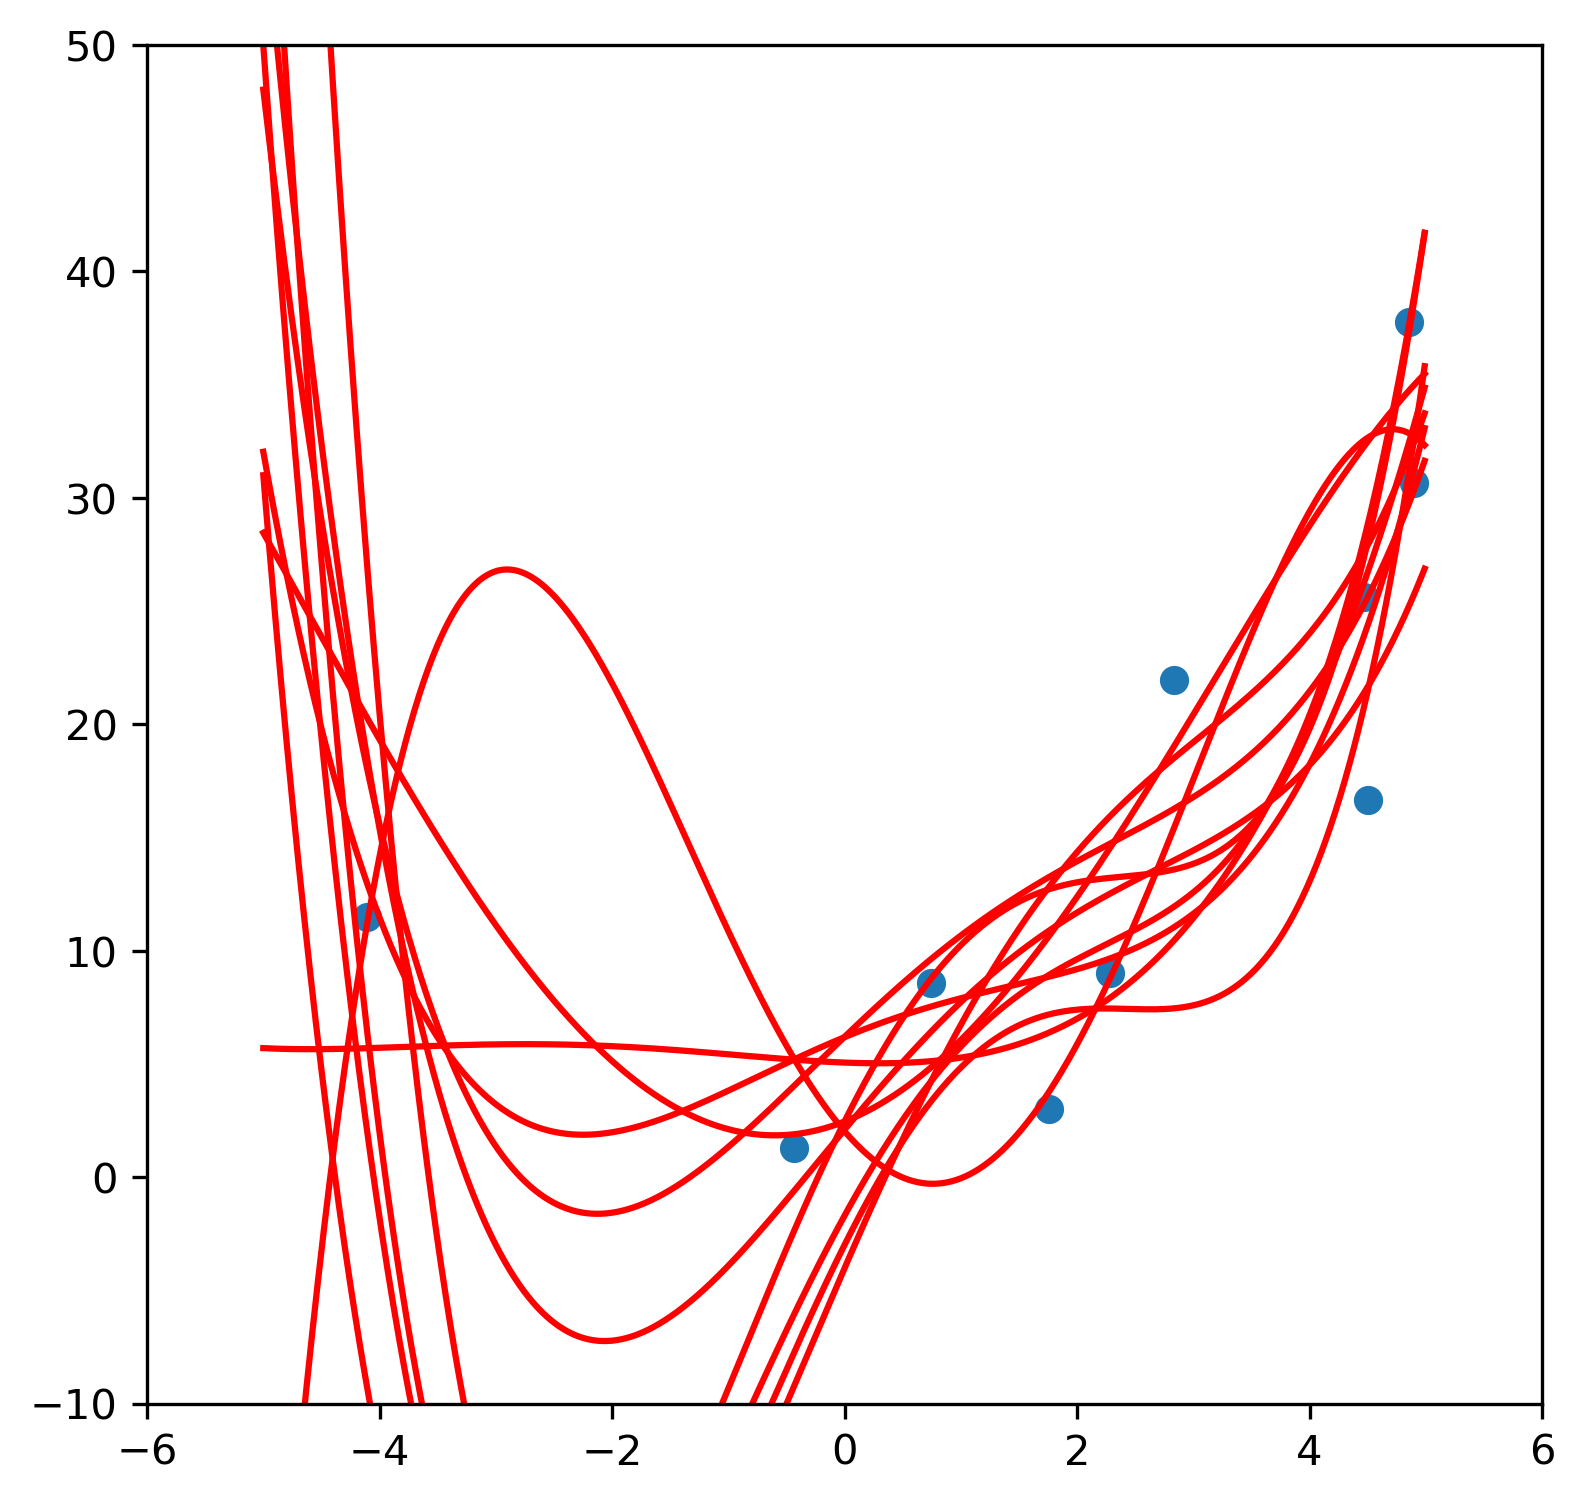

In [14]:
update(data[:10])
draw_estimates(10, data[:10])

a: 26.0
b: 705.6265620740724
lambda: 0.045299970998440575
mu: [[ 0.8388189 ]
 [ 2.20371818]
 [ 0.79911964]
 [-0.03863364]
 [ 0.0113557 ]]
Lambda: [[5.00000001e+01 2.55053811e+01 4.86052805e+02 4.86503188e+02
  7.76779732e+03]
 [2.55053811e+01 4.86052805e+02 4.86503188e+02 7.76779732e+03
  1.14305483e+04]
 [4.86052805e+02 4.86503188e+02 7.76779732e+03 1.14305483e+04
  1.43947967e+05]
 [4.86503188e+02 7.76779732e+03 1.14305483e+04 1.43947967e+05
  2.77089956e+05]
 [7.76779732e+03 1.14305483e+04 1.43947967e+05 2.77089956e+05
  2.86714342e+06]]
lambdaLambda: [[2.26499855e+00 1.15539302e+00 2.20181780e+01 2.20385803e+01
  3.51880993e+02]
 [1.15539302e+00 2.20181780e+01 2.20385803e+01 3.51880993e+02
  5.17803506e+02]
 [2.20181780e+01 2.20385803e+01 3.51880993e+02 5.17803506e+02
  6.52083873e+03]
 [2.20385803e+01 3.51880993e+02 5.17803506e+02 6.52083873e+03
  1.25521670e+04]
 [3.51880993e+02 5.17803506e+02 6.52083873e+03 1.25521670e+04
  1.29881514e+05]]
lambda: 0.04118088482281829
mu: [[ 0.8

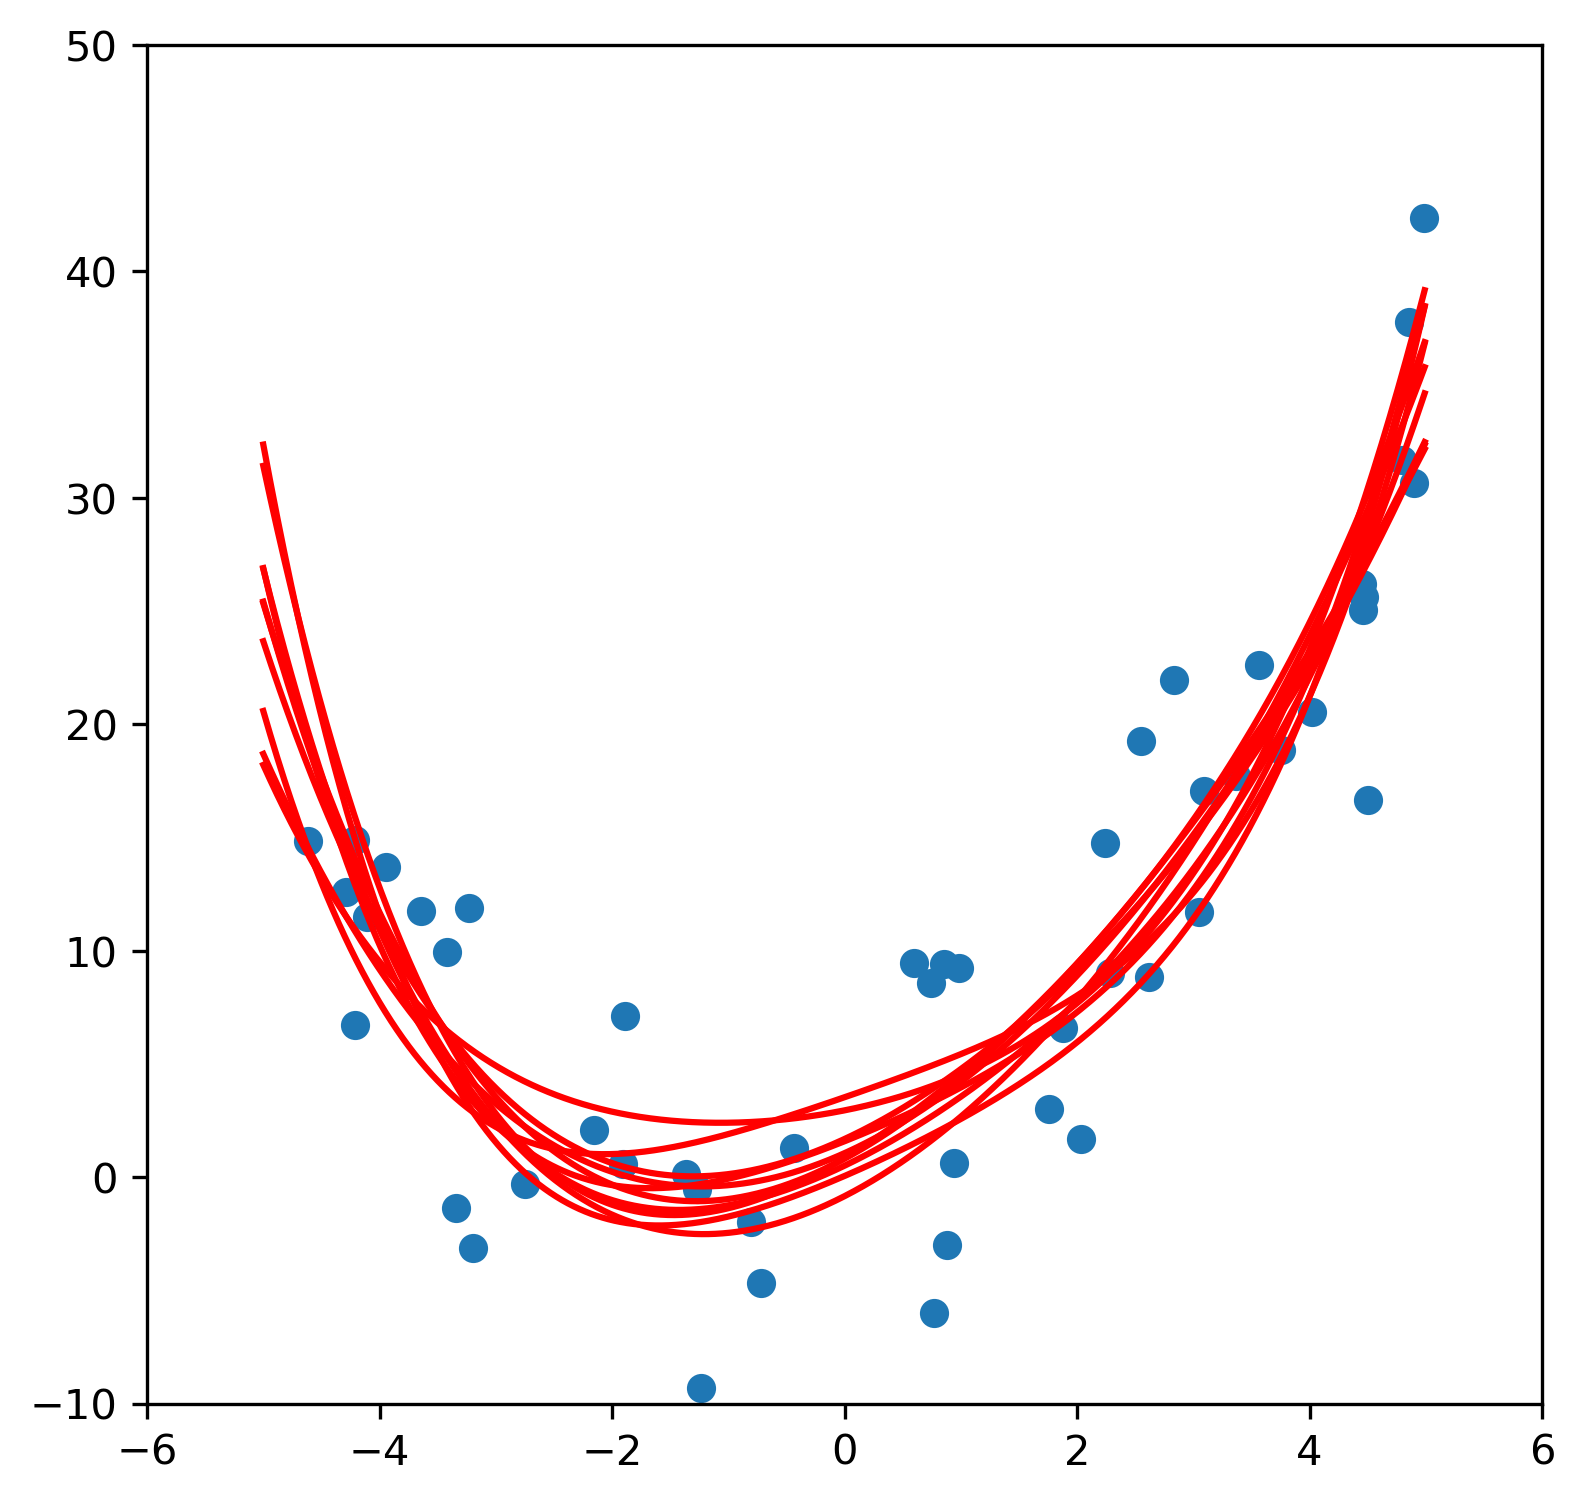

In [15]:
update(data[:50])
draw_estimates(10, data[:50])

a: 51.0
b: 1372.8284177483329
lambda: 0.04496275075594349
mu: [[ 1.81365908]
 [ 2.05108539]
 [ 0.95665224]
 [-0.0040483 ]
 [-0.00289683]]
Lambda: [[ 1.00000000e+02  4.82325250e-01  8.46332185e+02 -6.93644080e+00
   1.28618251e+04]
 [ 4.82325250e-01  8.46332185e+02 -6.93644080e+00  1.28618251e+04
   1.97122690e+03]
 [ 8.46332185e+02 -6.93644080e+00  1.28618251e+04  1.97122690e+03
   2.30633278e+05]
 [-6.93644080e+00  1.28618251e+04  1.97122690e+03  2.30633278e+05
   8.42521136e+04]
 [ 1.28618251e+04  1.97122690e+03  2.30633278e+05  8.42521136e+04
   4.48241572e+06]]
lambdaLambda: [[ 4.49627508e+00  2.16866700e-02  3.80534231e+01 -3.11881459e-01
   5.78303038e+02]
 [ 2.16866700e-02  3.80534231e+01 -3.11881459e-01  5.78303038e+02
   8.86317839e+01]
 [ 3.80534231e+01 -3.11881459e-01  5.78303038e+02  8.86317839e+01
   1.03699066e+04]
 [-3.11881459e-01  5.78303038e+02  8.86317839e+01  1.03699066e+04
   3.78820679e+03]
 [ 5.78303038e+02  8.86317839e+01  1.03699066e+04  3.78820679e+03
   2.015

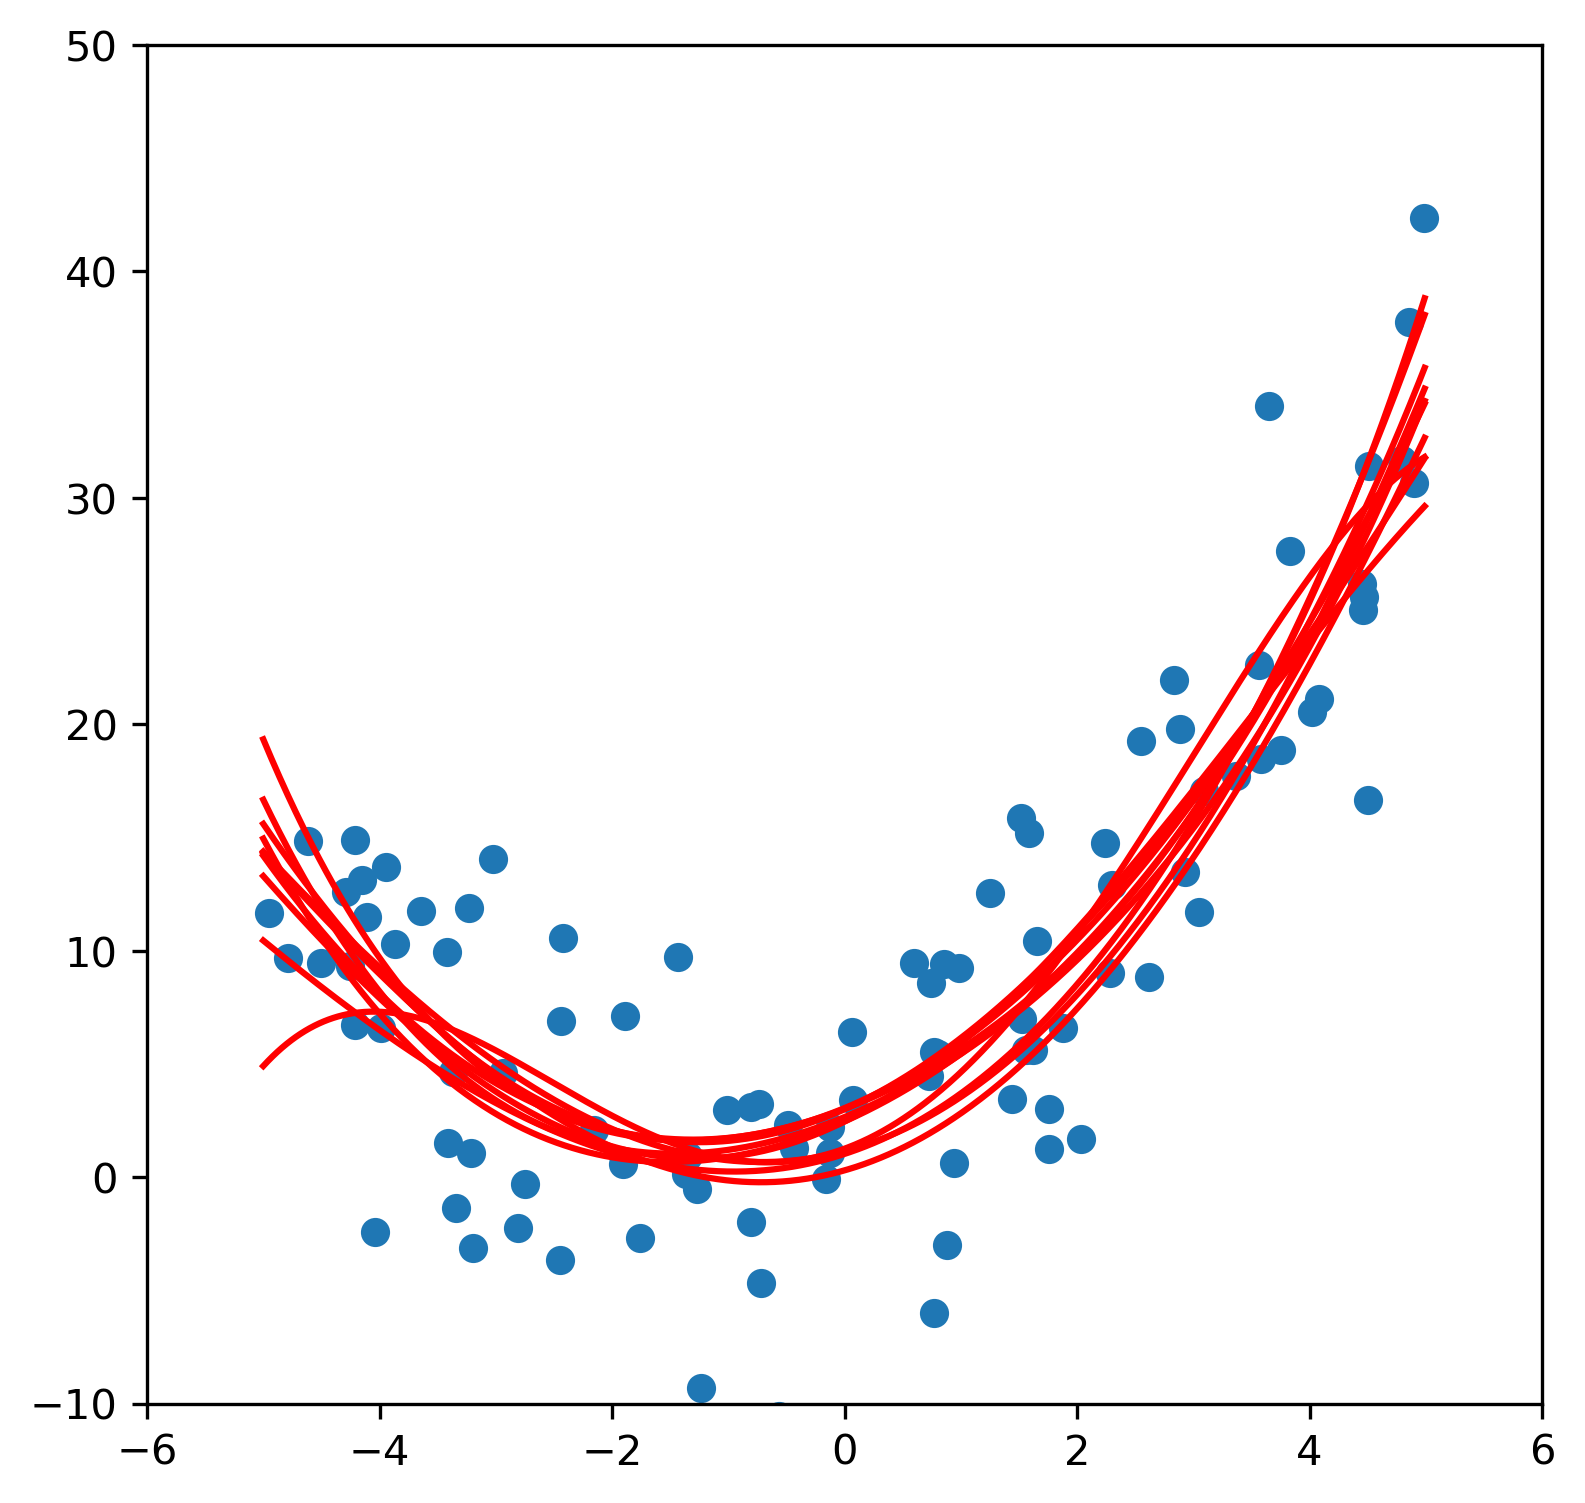

In [16]:
update(data[:100])
draw_estimates(10, data[:100])

a: 101.0
b: 2537.2816970677013
lambda: 0.03638130791919116
mu: [[ 1.78564419e+00]
 [ 2.16019349e+00]
 [ 9.78566994e-01]
 [-1.42647322e-02]
 [-1.07348696e-03]]
Lambda: [[ 2.00000000e+02 -2.82309821e+01  1.72464983e+03 -3.84074500e+02
   2.51835331e+04]
 [-2.82309821e+01  1.72464983e+03 -3.84074500e+02  2.51835331e+04
  -3.62677440e+03]
 [ 1.72464983e+03 -3.84074500e+02  2.51835331e+04 -3.62677440e+03
   4.29439732e+05]
 [-3.84074500e+02  2.51835331e+04 -3.62677440e+03  4.29439732e+05
  -3.51332729e+03]
 [ 2.51835331e+04 -3.62677440e+03  4.29439732e+05 -3.51332729e+03
   7.93174421e+06]]
lambdaLambda: [[ 7.27626159e+00 -1.02708005e+00  6.27450165e+01 -1.39731327e+01
   9.16209872e+02]
 [-1.02708005e+00  6.27450165e+01 -1.39731327e+01  9.16209872e+02
  -1.31946796e+02]
 [ 6.27450165e+01 -1.39731327e+01  9.16209872e+02 -1.31946796e+02
   1.56235791e+04]
 [-1.39731327e+01  9.16209872e+02 -1.31946796e+02  1.56235791e+04
  -1.27819442e+02]
 [ 9.16209872e+02 -1.31946796e+02  1.56235791e+04 -1.

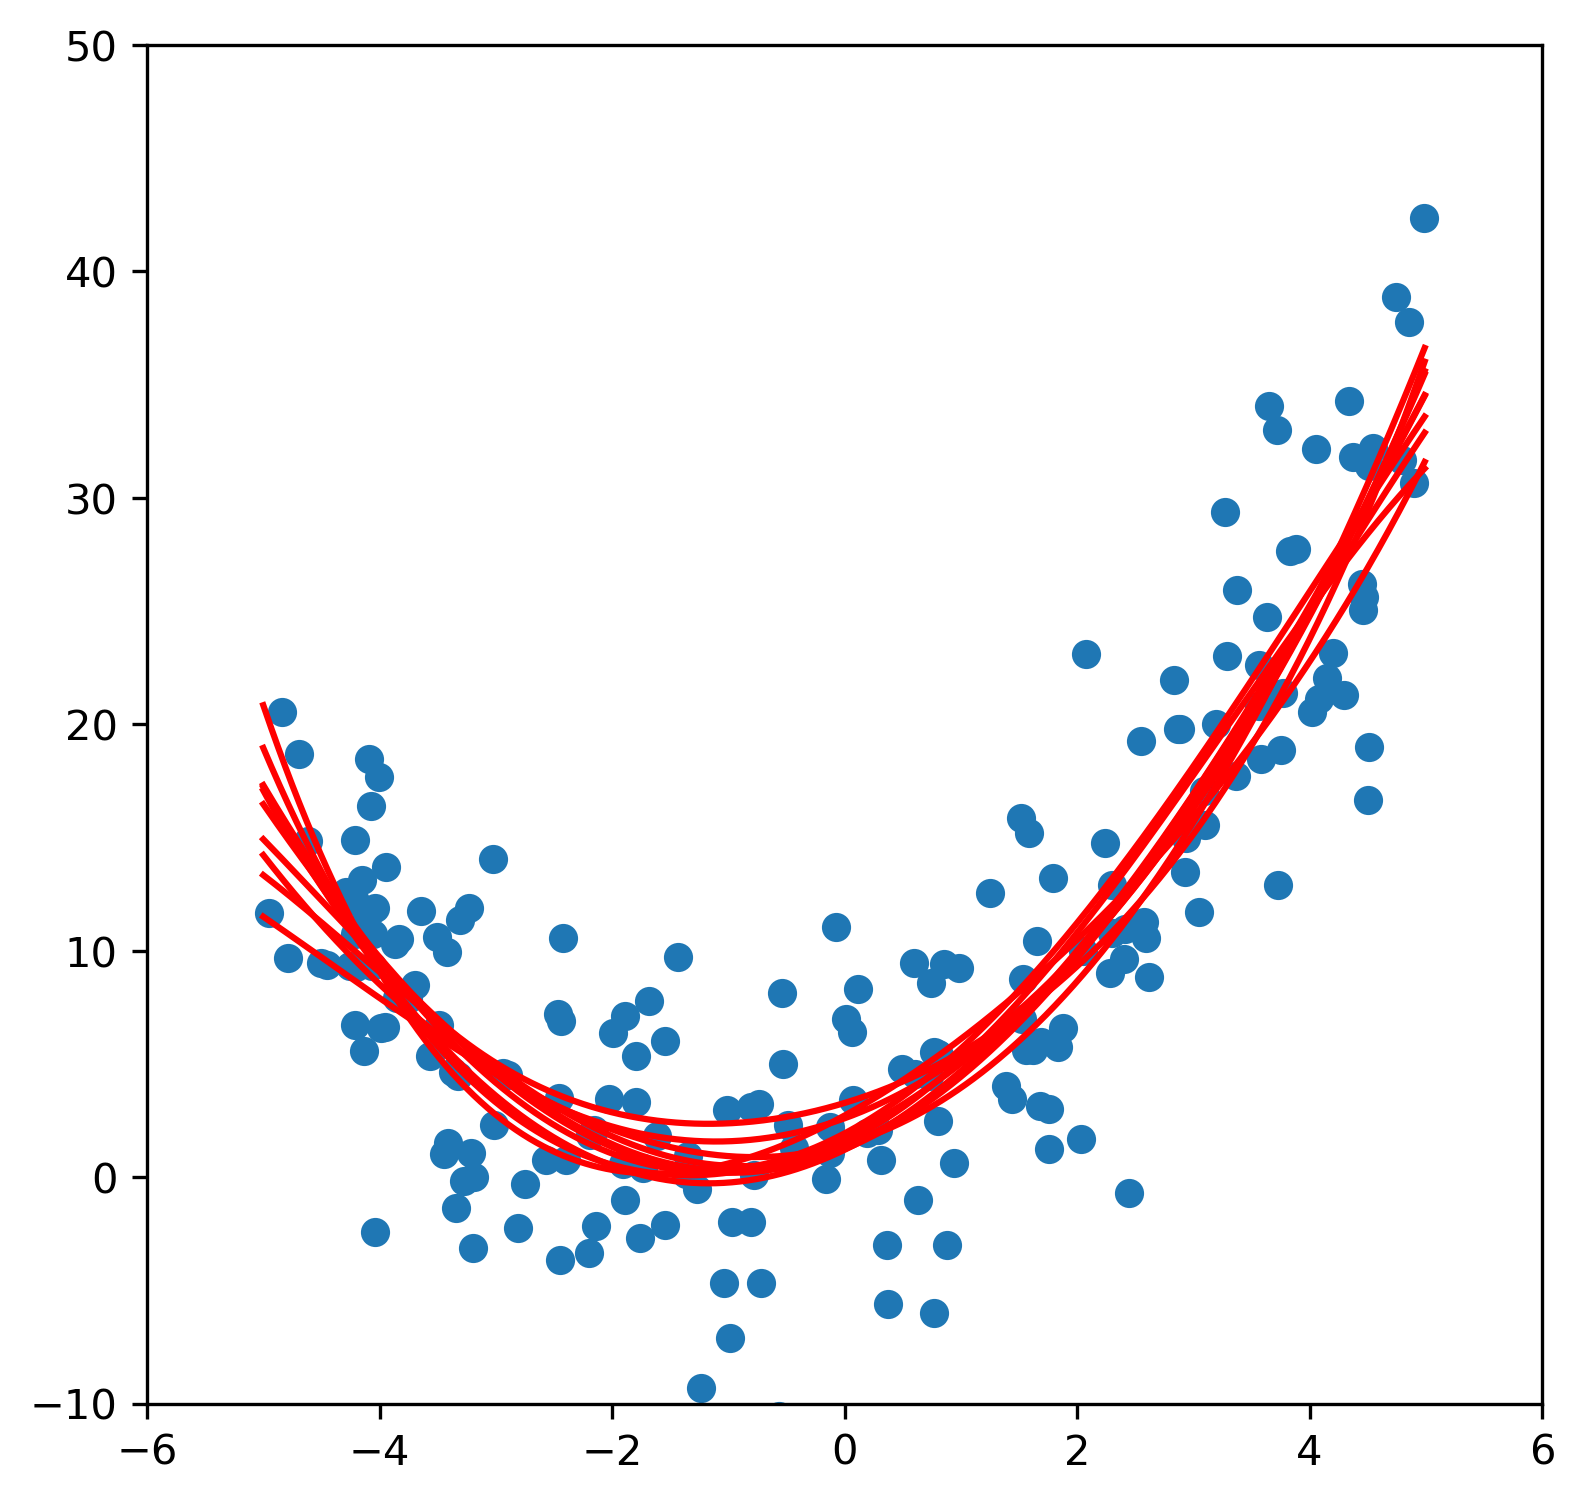

In [17]:
update(data[:200])
draw_estimates(10, data[:200])

a: 251.0
b: 6404.282725739162
lambda: 0.036812603021244464
mu: [[ 1.41452968e+00]
 [ 2.34482056e+00]
 [ 9.89934869e-01]
 [-2.80456885e-02]
 [ 4.85161354e-04]]
Lambda: [[ 5.00000000e+02 -1.57506357e+02  3.81918682e+03 -1.80020030e+03
   5.39792814e+04]
 [-1.57506357e+02  3.81918682e+03 -1.80020030e+03  5.39792814e+04
  -2.46449405e+04]
 [ 3.81918682e+03 -1.80020030e+03  5.39792814e+04 -2.46449405e+04
   9.12215243e+05]
 [-1.80020030e+03  5.39792814e+04 -2.46449405e+04  9.12215243e+05
  -3.59215983e+05]
 [ 5.39792814e+04 -2.46449405e+04  9.12215243e+05 -3.59215983e+05
   1.68069241e+07]]
lambdaLambda: [[ 1.84063015e+01 -5.79821901e+00  1.40594208e+02 -6.62700589e+01
   1.98711786e+03]
 [-5.79821901e+00  1.40594208e+02 -6.62700589e+01  1.98711786e+03
  -9.07244411e+02]
 [ 1.40594208e+02 -6.62700589e+01  1.98711786e+03 -9.07244411e+02
   3.35810176e+04]
 [-6.62700589e+01  1.98711786e+03 -9.07244411e+02  3.35810176e+04
  -1.32236754e+04]
 [ 1.98711786e+03 -9.07244411e+02  3.35810176e+04 -1.

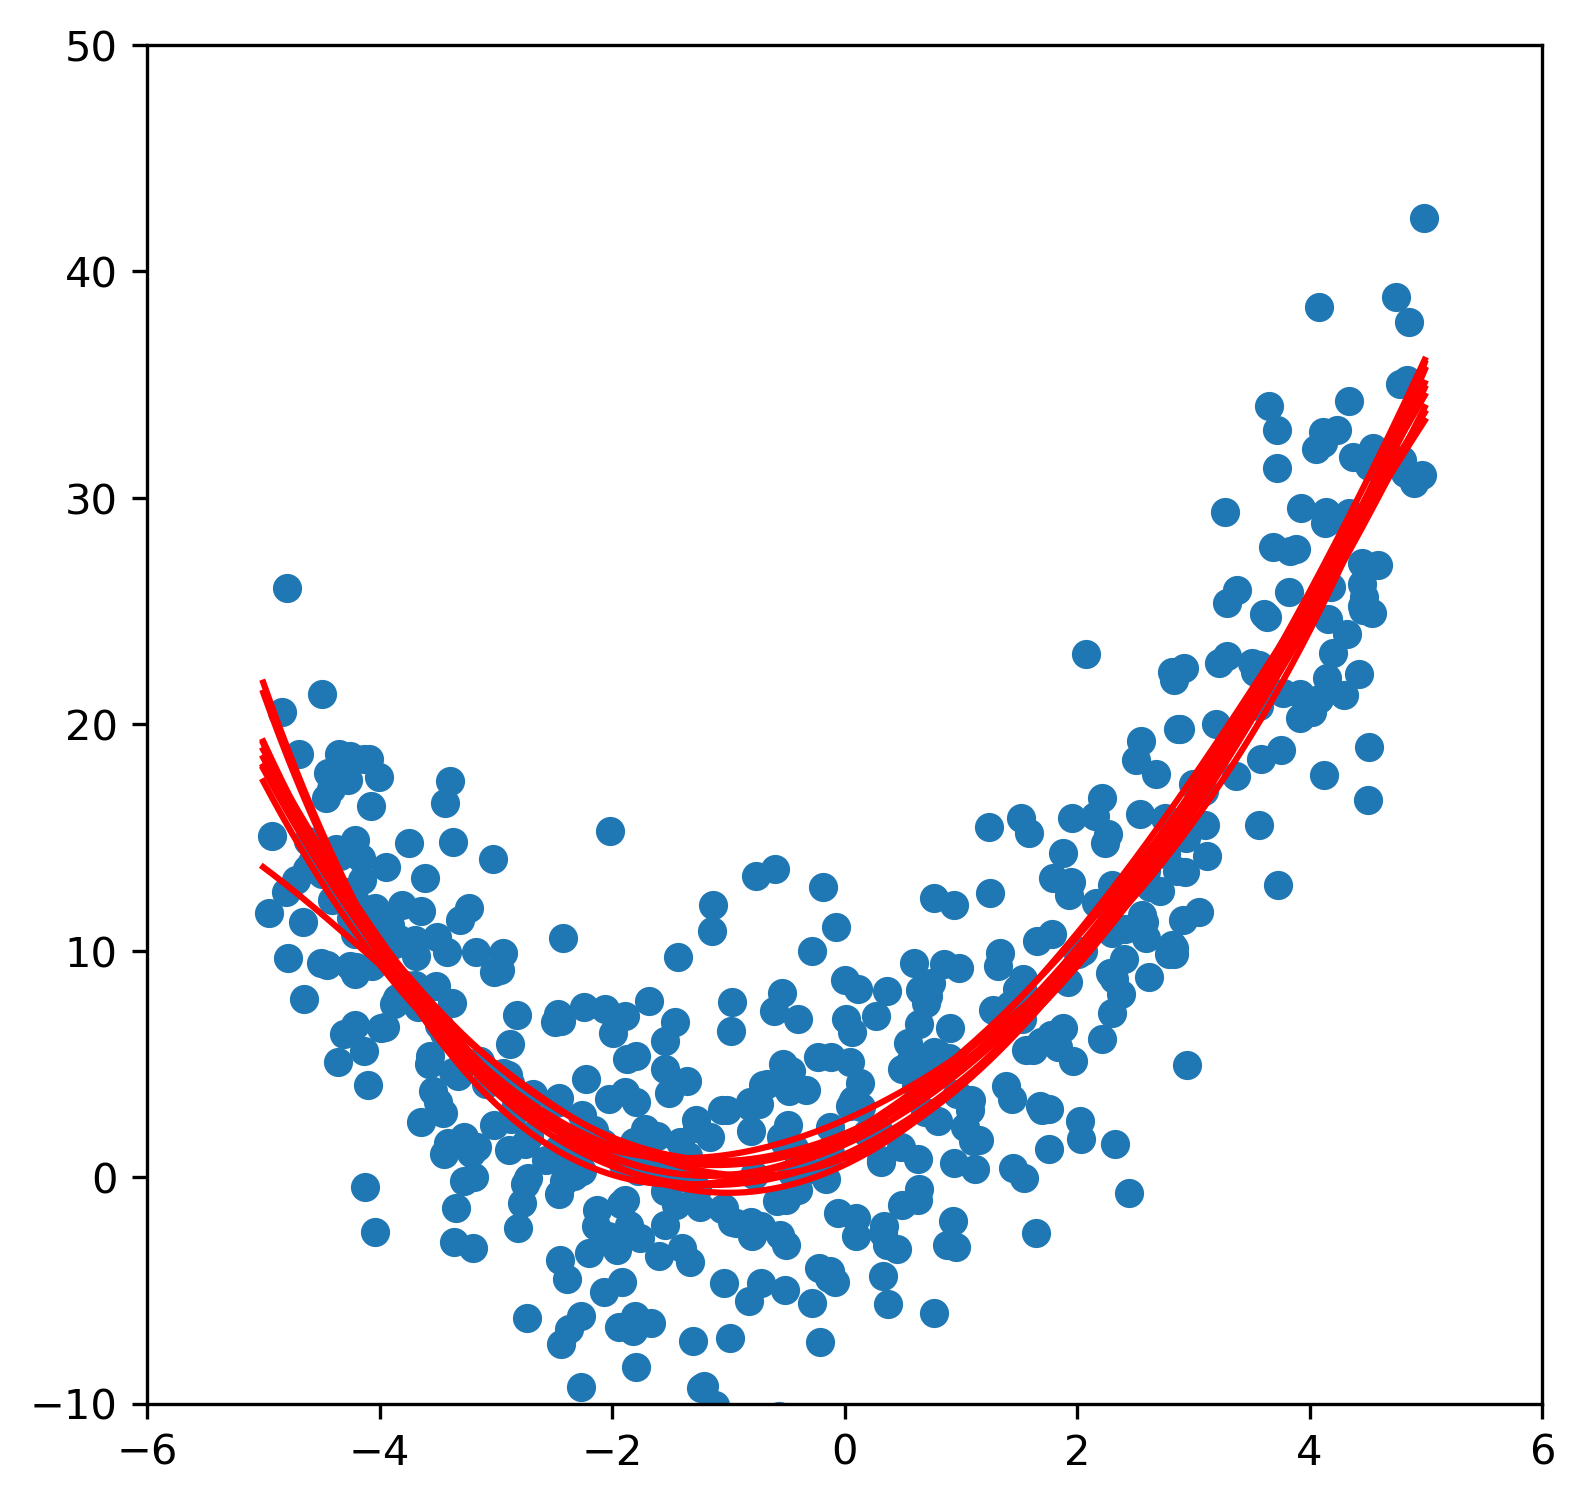

In [18]:
update(data[:500])
draw_estimates(10, data[:500])

a: 501.0
b: 12411.13020792947
lambda: 0.04080497042903641
mu: [[ 1.11052268]
 [ 2.18766322]
 [ 0.92978161]
 [-0.0137236 ]
 [ 0.00437769]]
Lambda: [[ 1.00000000e+03 -9.49305664e+01  7.97236281e+03 -1.15167738e+03
   1.16405628e+05]
 [-9.49305664e+01  7.97236281e+03 -1.15167738e+03  1.16405628e+05
  -1.64958438e+04]
 [ 7.97236281e+03 -1.15167738e+03  1.16405628e+05 -1.64958438e+04
   2.03675407e+06]
 [-1.15167738e+03  1.16405628e+05 -1.64958438e+04  2.03675407e+06
  -2.18619793e+05]
 [ 1.16405628e+05 -1.64958438e+04  2.03675407e+06 -2.18619793e+05
   3.89493119e+07]]
lambdaLambda: [[ 4.08049704e+01 -3.87363895e+00  3.25312029e+02 -4.69941616e+01
   4.74992823e+03]
 [-3.87363895e+00  3.25312029e+02 -4.69941616e+01  4.74992823e+03
  -6.73112420e+02]
 [ 3.25312029e+02 -4.69941616e+01  4.74992823e+03 -6.73112420e+02
   8.31096896e+04]
 [-4.69941616e+01  4.74992823e+03 -6.73112420e+02  8.31096896e+04
  -8.92077421e+03]
 [ 4.74992823e+03 -6.73112420e+02  8.31096896e+04 -8.92077421e+03
   1.589

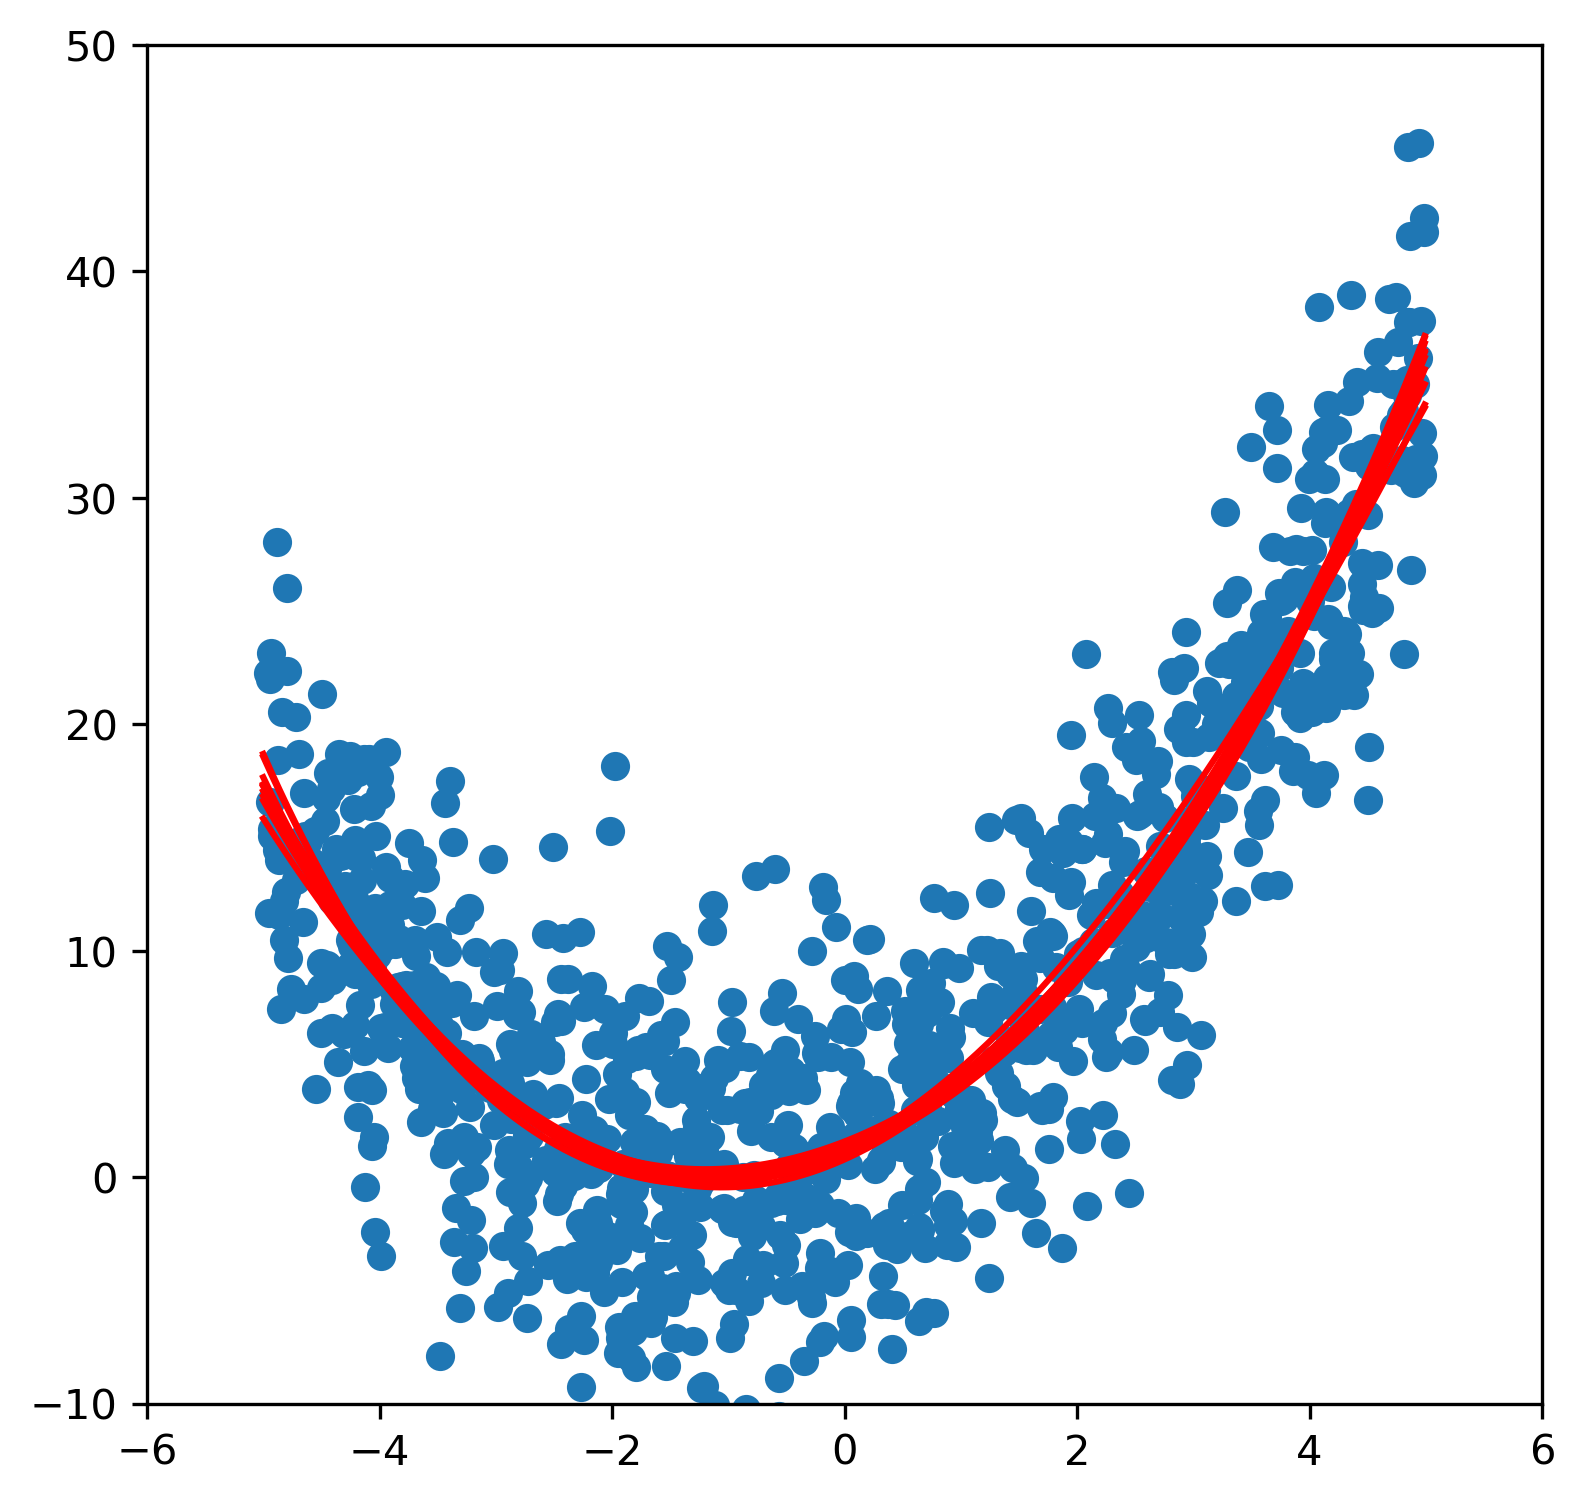

In [19]:
update(data)
draw_estimates(10, data)

In [20]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[15.1793888 ],
        [28.68609911],
        [-8.26742081],
        [-1.7030062 ],
        [ 0.47521185]]),
 array([[ 3.190423  ],
        [ 4.37280402],
        [-0.31701561],
        [-0.19051214],
        [ 0.06462408]]),
 array([[ 0.8388189 ],
        [ 2.20371818],
        [ 0.79911964],
        [-0.03863364],
        [ 0.0113557 ]]),
 array([[ 1.81365908],
        [ 2.05108539],
        [ 0.95665224],
        [-0.0040483 ],
        [-0.00289683]]),
 array([[ 1.78564419e+00],
        [ 2.16019349e+00],
        [ 9.78566994e-01],
        [-1.42647322e-02],
        [-1.07348696e-03]]),
 array([[ 1.41452968e+00],
        [ 2.34482056e+00],
        [ 9.89934869e-01],
        [-2.80456885e-02],
        [ 4.85161354e-04]]),
 array([[ 1.11052268],
        [ 2.18766322],
        [ 0.92978161],
        [-0.0137236 ],
        [ 0.00437769]])]

In [21]:
a

[1, 3.5, 6.0, 26.0, 51.0, 101.0, 251.0, 501.0]

In [22]:
b

[100,
 100.00005623864456,
 230.5675214238811,
 705.6265620740724,
 1372.8284177483329,
 2537.2816970677013,
 6404.282725739162,
 12411.13020792947]

In [23]:
1/np.sqrt(lmd)

array([15.13498521])

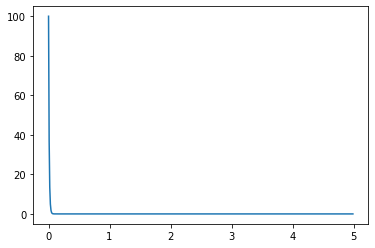

In [24]:
draw(lambda_dist, 0, 5, 0.01)

In [25]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + 2*x + 1.0 + np.random.randn()*5
    
    data.append([x,y])
    
data

[[0.4802876188152516, -0.32701865010203424],
 [-2.798197888623013, 4.372147526635761],
 [-1.3683453020587055, -3.1163570039436044],
 [1.5150758244153795, -0.026876355465141444],
 [3.1676397068571283, 18.046898543192913],
 [2.505295951056291, 13.438369557204613],
 [3.617366175277883, 22.345027090778842],
 [2.5688347346555505, 14.899956404461548],
 [-2.100553511495633, -8.121170280655054],
 [1.7054538424583465, 3.7096255003508216],
 [-0.8024894678946615, -6.909053458152815],
 [-4.5747096764278545, 16.33214900057539],
 [2.002823539693307, 10.954103107495659],
 [1.0851759925361304, 6.443648067509434],
 [-0.9132728298556569, 6.508829882772331],
 [4.097765518685788, 32.83935516447734],
 [2.7286210000380198, 20.792358891960053],
 [-1.9720625774512102, 2.1254590097523702],
 [-3.4945183341081254, 20.439718094660233],
 [-3.9776067002230286, 4.976006259646631],
 [0.24342290806595113, -3.094898272247235],
 [-3.55208810855288, 13.972608039491883],
 [-3.174111810763981, 4.235590902207399],
 [-4.5278

In [26]:
gauss_lambda

[array([[1.e-07, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
        [0.e+00, 1.e-07, 0.e+00, 0.e+00, 0.e+00],
        [0.e+00, 0.e+00, 1.e-07, 0.e+00, 0.e+00],
        [0.e+00, 0.e+00, 0.e+00, 1.e-07, 0.e+00],
        [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-07]]),
 array([[5.00000010e+00, 7.68984794e+00, 6.93852780e+01, 1.62054552e+02,
         1.33674124e+03],
        [7.68984794e+00, 6.93852781e+01, 1.62054552e+02, 1.33674124e+03,
         3.67981074e+03],
        [6.93852780e+01, 1.62054552e+02, 1.33674124e+03, 3.67981074e+03,
         2.74834610e+04],
        [1.62054552e+02, 1.33674124e+03, 3.67981074e+03, 2.74834610e+04,
         8.67902148e+04],
        [1.33674124e+03, 3.67981074e+03, 2.74834610e+04, 8.67902148e+04,
         5.85752420e+05]]),
 array([[1.00000001e+01, 2.18143398e+01, 1.21852274e+02, 3.83805151e+02,
         2.32988546e+03],
        [2.18143398e+01, 1.21852274e+02, 3.83805151e+02, 2.32988546e+03,
         8.24810768e+03],
        [1.21852274e+02, 3.83805151e+02, 2.32988546e+

In [27]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[15.1793888 ],
        [28.68609911],
        [-8.26742081],
        [-1.7030062 ],
        [ 0.47521185]]),
 array([[ 3.190423  ],
        [ 4.37280402],
        [-0.31701561],
        [-0.19051214],
        [ 0.06462408]]),
 array([[ 0.8388189 ],
        [ 2.20371818],
        [ 0.79911964],
        [-0.03863364],
        [ 0.0113557 ]]),
 array([[ 1.81365908],
        [ 2.05108539],
        [ 0.95665224],
        [-0.0040483 ],
        [-0.00289683]]),
 array([[ 1.78564419e+00],
        [ 2.16019349e+00],
        [ 9.78566994e-01],
        [-1.42647322e-02],
        [-1.07348696e-03]]),
 array([[ 1.41452968e+00],
        [ 2.34482056e+00],
        [ 9.89934869e-01],
        [-2.80456885e-02],
        [ 4.85161354e-04]]),
 array([[ 1.11052268],
        [ 2.18766322],
        [ 0.92978161],
        [-0.0137236 ],
        [ 0.00437769]])]